# T1 - Programacao Concorrente


# Objetivo
Implementar em C no Linux o programa CONTROLADOR, o qual deve incluir as seguintes funcionalidades de controle:

- Laço de controle como tarefa periódica para a temperatura;
- Uso do tanque auxiliar e da saída de água;
- Informações na tela sobre a situação corrente.

Outros requisitos:
- Não usar threads;
- Período do controlador de temperatura deve ser 30ms exato, ver exemplo;
- Atualização da tela pode ser aproximadamente a cada 1 segundo.

Adicionalmente:

- Número de amostras >= 10000.
- Usar como unidade microsegundo nos gráficos.
- Fazer a coleta dos dados em máquina real e não em máquina virtual.
- Gerar relatório em PDF com texto descrevendo as observações e os gráficos.

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [26]:
NANOSEC_PER_MICRO = 1000
temperature_response_times = pd.read_csv('temperature.csv', header=None)
temperature_response_times.columns = ['response_times_ns']
display(temperature_response_times)

height_response_times = pd.read_csv('height.csv', header=None)
height_response_times.columns = ['response_times_ns']
display(height_response_times)

alarm_response_times = pd.read_csv('alarm.csv', header=None)
alarm_response_times.columns = ['response_times_ns']
alarm_response_times

,response_times_ns
0,2554980
1,784024
2,1601030
3,919919
4,1784369
...,...
514,2710635
515,1345372
516,2691360
517,1572694


,response_times_ns
0,2398190
1,1281398
2,1508281
3,1819043
4,600811
...,...
514,1908052
515,1146317
516,593455
517,656711


,response_times_ns
0,958655
1,62268
2,68243
3,187350
4,146888
...,...
4357,65978
4358,66976
4359,86215
4360,57917


In [31]:
def plot_resposnse_time(response_times, name):
    rtmis = response_times.response_times_ns / NANOSEC_PER_MICRO

    sns_plot = plt.figure(figsize=(15, 10))
    sns.histplot(rtmis)
    plt.title(f'Distribuição dos tempos de resposta para a(o) {name}')
    plt.ylabel('Contagem')
    plt.xlabel('Tempo de resposta [μs]')
    # sns_plot.savefig("response_time_distribution.png")
    plt.show()

    print(f'Numero de amostras: {response_times.shape[0]}')
    print(f'Media: {rtmis.mean()} μs')
    print(f'Mediana: {rtmis.median()} μs')
    print(f'Desvio padrao: {rtmis.std()} μs')
    print(f'Max: {rtmis.max()} μs')
    print(f'Min: {rtmis.min()} μs')

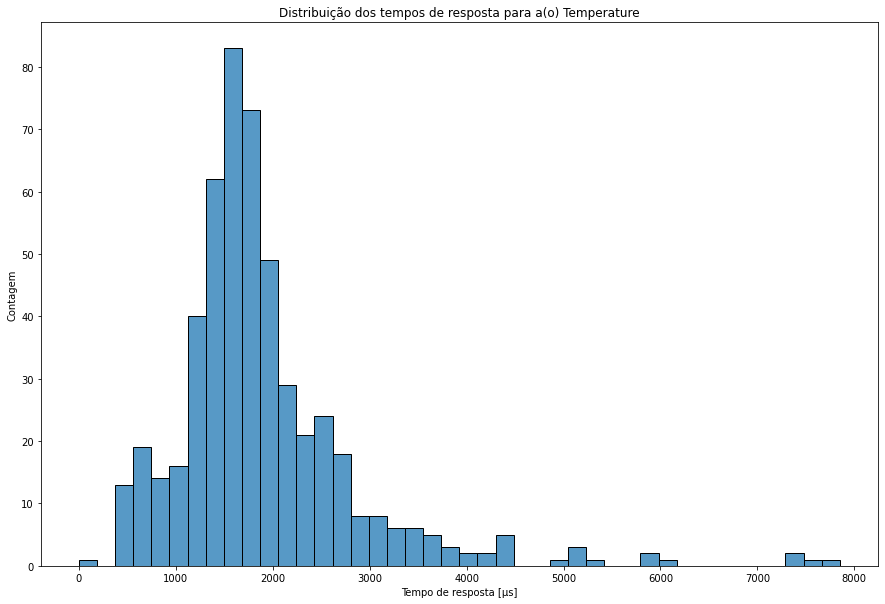

Numero de amostras: 519
Media: 1910.4911849710984 μs
Mediana: 1720.913 μs
Desvio padrao: 986.9420595695664 μs
Max: 7849.914 μs
Min: 0.416 μs


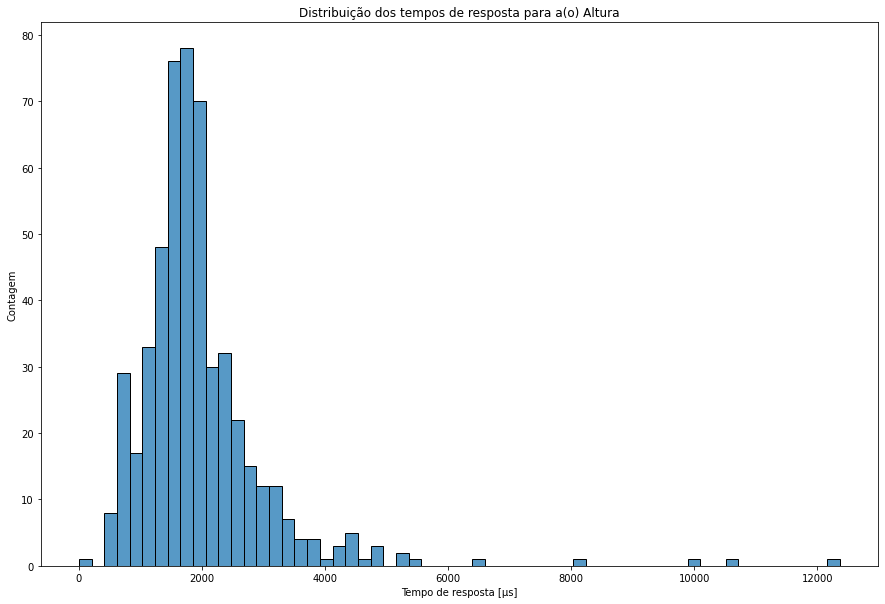

Numero de amostras: 519
Media: 1975.3047052023119 μs
Mediana: 1765.743 μs
Desvio padrao: 1125.5319974209724 μs
Max: 12367.336 μs
Min: 0.603 μs


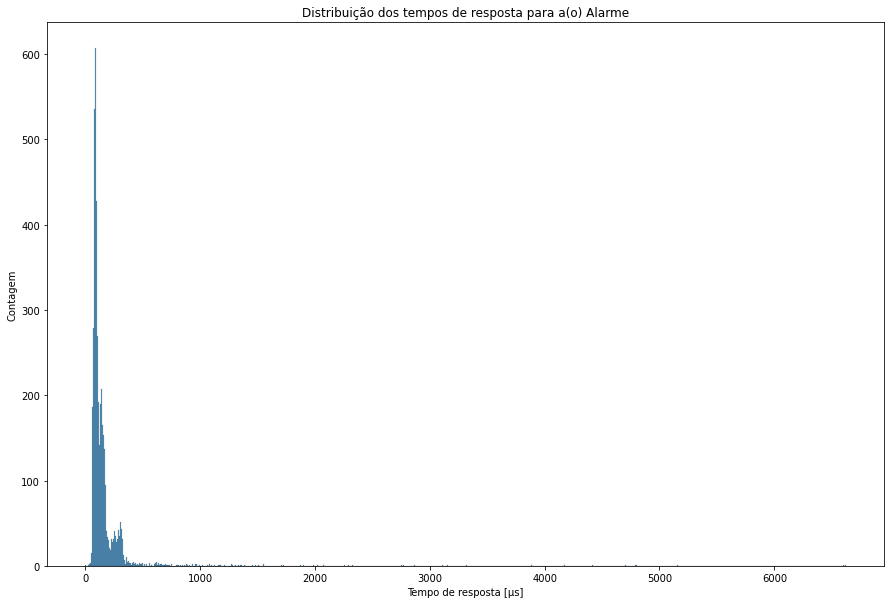

Numero de amostras: 4362
Media: 164.77893305823017 μs
Mediana: 106.9625 μs
Desvio padrao: 293.228966819366 μs
Max: 6624.231 μs
Min: 0.006 μs


In [32]:
plot_resposnse_time(temperature_response_times, 'Temperature')
plot_resposnse_time(height_response_times, 'Altura')
plot_resposnse_time(alarm_response_times, 'Alarme')

Grupo: David Steiner Sand - 17100655


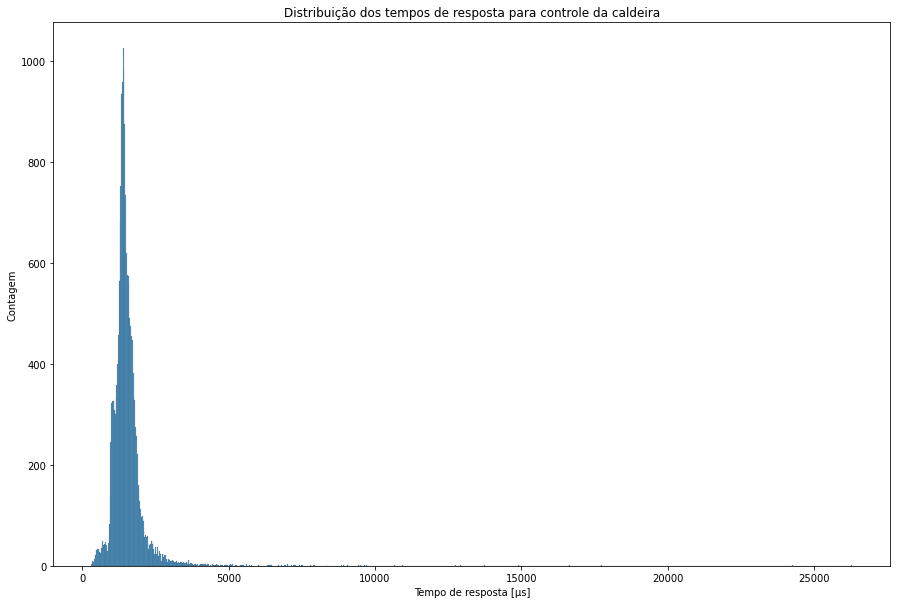

Numero de amostras: 20000
Media: 1532.2609378 μs
Mediana: 1443.011 μs
Desvio padrao: 634.8227007513854 μs
Max: 26305.061 μs
Min: 316.344 μs
Codigo fonte: https://github.com/davidssand/concurrent-programming


In [8]:
print('Grupo: David Steiner Sand - 17100655')


print(f'Codigo fonte: https://github.com/davidssand/concurrent-programming')